<a href="https://colab.research.google.com/github/MagdaliniLytra/Machine-Learning-AI-Master/blob/main/ML_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.tree import plot_tree

# **Part one: Semi-Supervised Learning**

# Task 1: Dataset description

In [4]:
df = pd.read_csv('/content/wine-missing.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


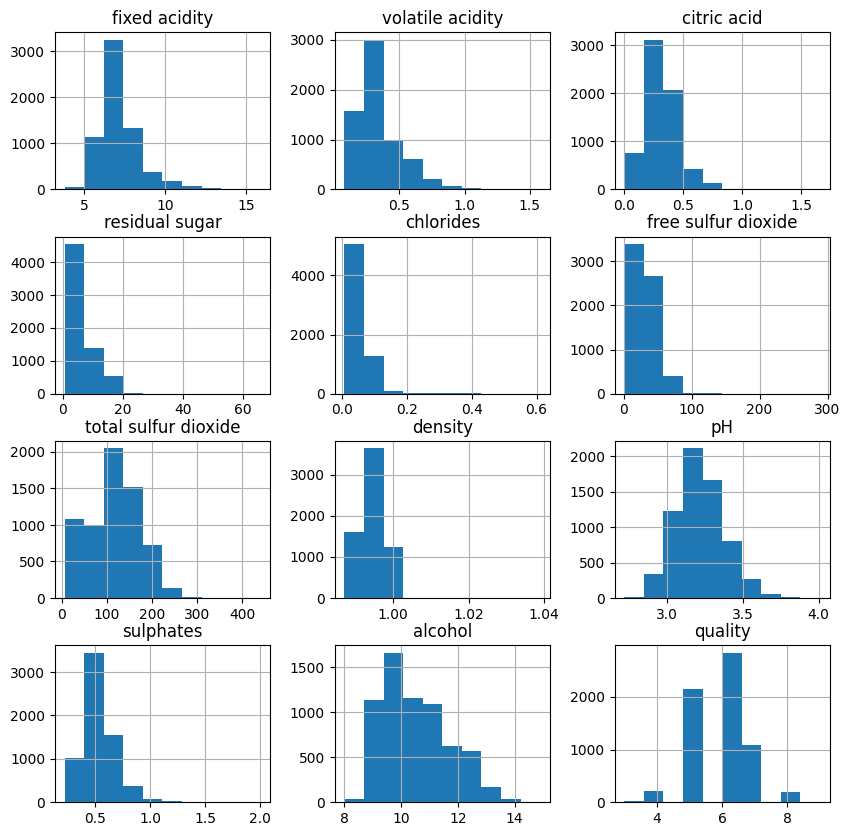

In [6]:
df.hist(figsize=(10, 10))
plt.show()

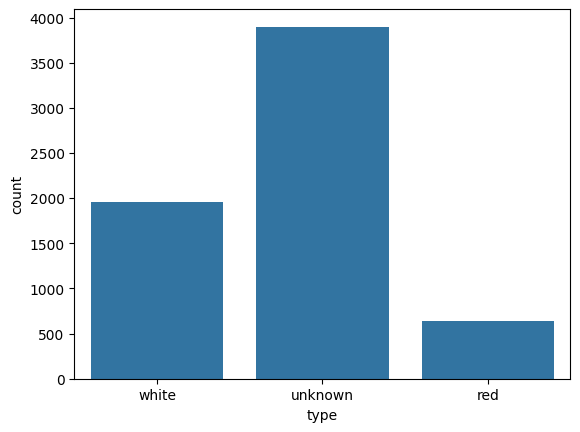

In [7]:
sns.countplot(x='type', data=df)
plt.show()

The dataset exhibits a clear class imbalance across the three wine types. The majority of the samples belong to the “unknown” category, with approximately 4,000 observations. This group represents cases where the wine type (white or red) is not labeled.

The second-largest class is white wine, which comprises roughly 2,000 samples, about half the size of the unknown class.

The smallest class is red wine, represented by approximately 500 samples, making it significantly underrepresented compared to both the unknown and white categories.

# Task 2

In [8]:
mapping = {"white": 0, "red": 1, "unknown": 2}
df["type"] = df["type"].map(mapping)
input_df = df.drop(columns=['type'])
targets_df = df['type']
x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

# Task 3: Create known/unknown datasets

In [9]:
known_filtered = df["type"] != 2
x_known = df.loc[known_filtered].drop(columns=["type"]).to_numpy()
y_known = df.loc[known_filtered, "type"].to_numpy()

unknown_filtered = df["type"] == 2
x_unknown = df.loc[unknown_filtered].drop(columns=["type"]).to_numpy()
x_known.shape, y_known.shape, x_unknown.shape

((2599, 12), (2599,), (3898, 12))

# Task 4: train/test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=0.3, random_state=42, stratify=y_known)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1819, 12), (1819,), (780, 12), (780,))

# Task 5: Random Forest evaluation

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


# Train metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

# Test metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)


In [12]:
metrics = {
    "accuracy":  [train_acc, test_acc],
    "precision": [train_precision, test_precision],
    "recall":    [train_recall, test_recall],
    "f1_score":  [train_f1, test_f1]
}

metrics_df = pd.DataFrame(metrics, index=["train", "test"])
metrics_df

,accuracy,precision,recall,f1_score
train,0.999450,0.997773,1.0,0.998885
test,0.998718,0.994819,1.0,0.997403


In imbalanced classification problems, such as this one, the F1-score provides a more truthful reflection of the model’s effectiveness. Accuracy becomes unreliable when the dataset is imbalanced, because the model can achieve a high accuracy by simply predicting the majority class most of the time, even if it performs poorly on the minority class. In contrast, the F1-score combines both precision and recall, ensuring that the model is evaluated on how well it identifies all classes, including the minority ones. This makes F1 a more balanced and meaningful measure of performance when class frequencies are uneven.

# Task 6: Retrain Random Forest with specific parameters

In [13]:
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


# Train metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

# Test metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

metrics = {
    "accuracy":  [train_acc, test_acc],
    "precision": [train_precision, test_precision],
    "recall":    [train_recall, test_recall],
    "f1_score":  [train_f1, test_f1]
}

metrics_df = pd.DataFrame(metrics, index=["train", "test"])
metrics_df


,accuracy,precision,recall,f1_score
train,0.999450,0.997773,1.000000,0.998885
test,0.994872,0.994737,0.984375,0.989529


According to the scikit-learn documentation, setting `class_weight="balanced"`, automatically adjusts the weight of each class inversely proportional to its frequency in the training data. Rare classes get higher weights and common classes get lower weights. This tells the Random Forest model to pay more attention to underrepresented classes reducing the chance that the model simply predicts the majority class. As we can see the metrics dropped slightly, which is expected, because the model is now more cautious and less biased toward the majority class. However, the metrics are extremely high overall because the underlying features strongly distinguish white and red wine, Random Forests perform very well on such data.

# Task 7: Predict probalities of wine types in the uknown dataset

In [14]:
y_unknown_proba = model.predict_proba(x_unknown)
y_unknown_proba[:10]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [15]:
y_unknown_proba.shape


(3898, 2)

# Task 8: Assign labels based on probabilities

In [16]:
model.classes_

array([0, 1])

In [17]:
red_proba = y_unknown_proba[:, 1]
y_unknown_pred = np.array(['unknown'] * len(red_proba))

# assign 'red' if probability > 0.65
y_unknown_pred[red_proba > 0.65] = 'red'

# assign 'white' if probability < 0.35
y_unknown_pred[red_proba < 0.35] = 'white'

In [18]:
np.unique(y_unknown_pred, return_counts=True)


(array(['red', 'unknown', 'white'], dtype='<U7'), array([ 908,   51, 2939]))

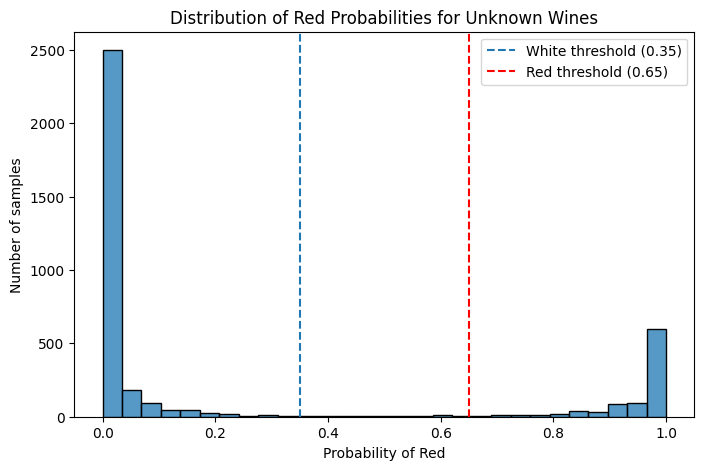

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(red_proba)
plt.axvline(0.35, linestyle='--', label='White threshold (0.35)')
plt.axvline(0.65, color='red', linestyle='--', label='Red threshold (0.65)')
plt.xlabel('Probability of Red')
plt.ylabel('Number of samples')
plt.title('Distribution of Red Probabilities for Unknown Wines')
plt.legend()
plt.show()

# Task 9: Combine newly labeled data with original

In [20]:
# include only confidently labeled samples ('red' or 'white')
confident = y_unknown_pred != 'unknown'
x_annotated = x_unknown[confident]
y_annotated = y_unknown_pred[confident]

# labels to match original encoding (white=0, red=1)
label_mapping = {'white': 0, 'red': 1}
y_annotated_encoded = np.array([label_mapping[label] for label in y_annotated])


In [21]:
x_train_final = np.vstack([x_train, x_annotated])
y_train_final = np.concatenate([y_train, y_annotated_encoded])
x_train_final.shape, y_train_final.shape

((5666, 12), (5666,))

In [22]:
new_model = RandomForestClassifier(random_state=42, class_weight='balanced')
new_model.fit(x_train_final, y_train_final)

y_train_pred = new_model.predict(x_train)
y_test_pred = new_model.predict(x_test)

train_acc_final = accuracy_score(y_train, y_train_pred)
test_acc_final  = accuracy_score(y_test, y_test_pred)

train_acc_final, test_acc_final

(0.999450247388675, 0.9948717948717949)

# Task 10: Semi-supervised learning and evaluation

In [23]:
red_threshold = 0.65
white_threshold = 0.35

# known
x_merged = x_train.copy()
y_merged = y_train.copy()

# unknown
x_unknown_remaining = x_unknown.copy()

iteration = 0

while len(x_unknown_remaining) > 0:
    iteration += 1
    print(f"Iteration {iteration}: {len(x_unknown_remaining)} unknown samples remaining")

    # train classifier on current merged set
    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(x_merged, y_merged)

    # predict probabilities for remaining unknowns
    y_proba = model.predict_proba(x_unknown_remaining)
    red_proba = y_proba[:, 1]

    # assign confident labels
    y_pred_labels = np.array(['unknown'] * len(red_proba))
    y_pred_labels[red_proba > red_threshold] = 'red'
    y_pred_labels[red_proba < white_threshold] = 'white'

    confident = y_pred_labels != 'unknown'
    if not np.any(confident):
        print("No more confident samples. Stopping.")
        break

    label_mapping = {'white': 0, 'red': 1}
    y_confident_encoded = np.array([label_mapping[label] for label in y_pred_labels[confident]])

    # add newly labeled samples to training set
    x_merged = np.vstack([x_merged, x_unknown_remaining[confident]])
    y_merged = np.concatenate([y_merged, y_confident_encoded])

    # remove newly labeled samples from unknown
    x_unknown_remaining = x_unknown_remaining[~confident]

# retrain final model
model_final = RandomForestClassifier(random_state=42, class_weight='balanced')
model_final.fit(x_merged, y_merged)

# evaluate on original train/test sets
y_train_pred = model_final.predict(x_train)
y_test_pred  = model_final.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Final Accuracy - Train: {train_acc}, Test: {test_acc}")

Iteration 1: 3898 unknown samples remaining
Iteration 2: 51 unknown samples remaining
Iteration 3: 28 unknown samples remaining
Iteration 4: 26 unknown samples remaining
Iteration 5: 21 unknown samples remaining
Iteration 6: 20 unknown samples remaining
No more confident samples. Stopping.
Final Accuracy - Train: 0.999450247388675, Test: 0.9961538461538462


Through the iterative self-training process, the model progressively labeled the unknown samples with high confidence predictions, reducing the pool of unlabeled instances from 3898 to just 20 over six iterations. In each cycle, confidently predicted red or white wines were added to the training set, and the Random Forest was retrained, gradually improving its ability to distinguish between the two classes. Compared to the initial model trained only on the known data , the final model achieved a slightly higher test accuracy, showing a small improvement in generalization. This indicates that the self-training strategy successfully leveraged the unlabeled data without introducing harmful noise, leading to a better classifier.

# **Part two: Model Evaluation**

# Task 1: Dataset description

In [24]:
df_full = pd.read_csv('/content/wine-full.csv')
df_full.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
df_full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


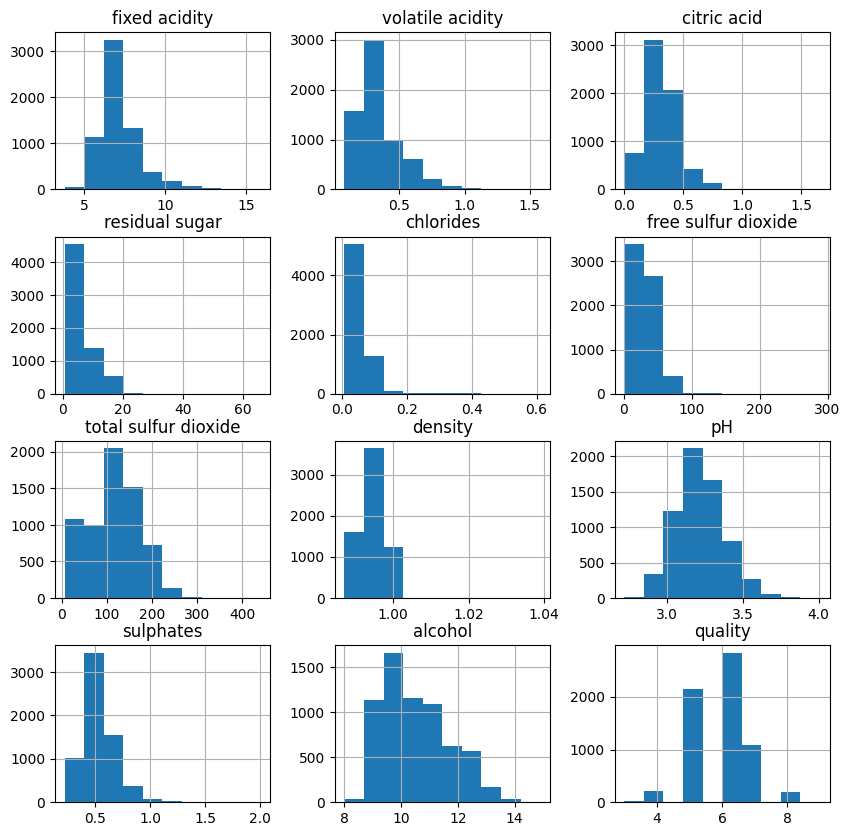

In [26]:
df_full.hist(figsize=(10, 10))
plt.show()

In [27]:
counts = df_full['quality'].value_counts()
counts

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


As we can see above the quality score is not balanced and the distribution is heavily skewed. Score 6 and score 5 dominate the dataset. Rare scores are the 3, 4, 8, 9 especially 3 and 9, which have very few samples.

# Task 2: Quality Distribution Red vs White Wine

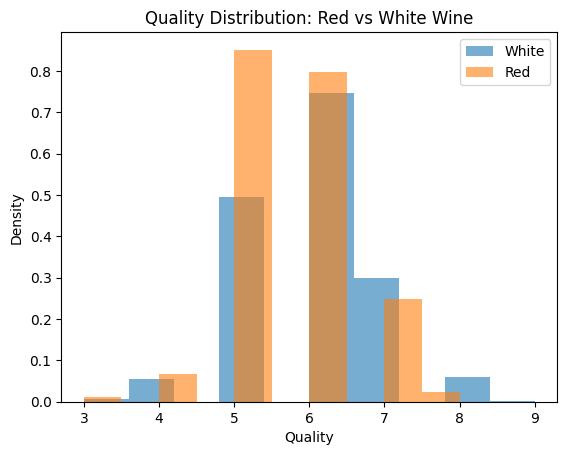

In [28]:
mapping = {"white": 0, "red": 1}
df_full["type"] = df_full["type"].map(mapping)
plt.hist(df_full[df_full['type']==0]['quality'], alpha=0.6, label='White', density=True)
plt.hist(df_full[df_full['type']==1]['quality'], alpha=0.6, label='Red', density=True)
plt.title('Quality Distribution: Red vs White Wine')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.legend()
plt.show()

The `density=True` normalizes each group so the total area equals 1, turning raw counts into probability densities. This removes the effect of different sample sizes that is important because there are far more white wines than red wines. As we can see above the whites have better quality than the reds.

# Task 3: Quality Distribution Sweet vs Dry Wines

sweetness
Dry      5.822459
Sweet    5.813397
Name: quality, dtype: float64
sweetness
Dry      3571
Sweet    2926
Name: count, dtype: int64


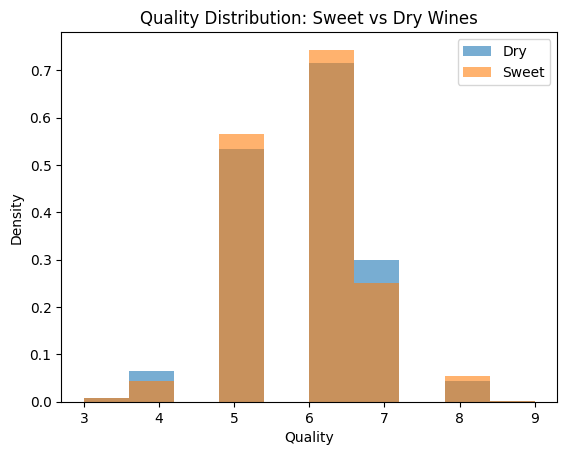

In [29]:
df_full2=df_full.copy()
df_full2['sweetness'] = df_full2['residual sugar'].apply(lambda x: 'Sweet' if x > 4 else 'Dry')

# compare mean quality
mean_quality = df_full2.groupby('sweetness')['quality'].mean()
print(mean_quality)
print(df_full2['sweetness'].value_counts())

for s in ['Dry', 'Sweet']:
    subset = df_full2[df_full2['sweetness'] == s]['quality']
    plt.hist(subset, bins=10, density=True, alpha=0.6, label=s)

plt.xlabel('Quality')
plt.ylabel('Density')
plt.title('Quality Distribution: Sweet vs Dry Wines')
plt.legend()
plt.show()

The mean quality is almost identical in both, though the sweets as we can see above have slighlty better quality.

# Task 4: train/test split



In [30]:
input_df = df_full.drop(columns=['quality'])
targets_df = df_full['quality']
x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

# Task 5: DecisionTreeRegressor evaluation

In [32]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.44769230769230767


# Task 6: Retrain and evaluate the model using different seeds

In [33]:
mae_scores = []
for seed in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(
        x, y, test_size=0.1, random_state=seed
    )

    model = DecisionTreeRegressor(random_state=seed)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(Y_test, y_pred)
    mae_scores.append(mae)

mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)
print("MAE scores per seed:", mae_scores)
print("Mean MAE:", mae_mean)
print("Std deviation MAE:", mae_std)

MAE scores per seed: [0.44769230769230767, 0.4707692307692308, 0.4230769230769231, 0.48307692307692307, 0.5015384615384615, 0.4492307692307692, 0.47384615384615386, 0.4430769230769231, 0.4338461538461538, 0.49538461538461537]
Mean MAE: 0.4621538461538462
Std deviation MAE: 0.025243899022730665


The repeated evaluation of the DecisionTreeRegressor over 10 different train/test splits produced a mean MAE of 0.462 and a standard deviation of 0.025. These results indicate that the model’s average prediction error is about 0.46 quality points, which is a reasonable performance level for wine quality prediction, given that quality scores fall within a narrow range (the socres fall between 3–9 as observed before) and the class is highly imablanced as observed before.

The relatively low standard deviation suggests that the model is stable and trustworthy, as its performance does not fluctuate much when the data is split differently. In other words, the model is not overly sensitive to the specific train/test partition and it generalises well.

The mean MAE provides a reliable estimate of the model’s typical error, while the standard deviation quantifies how consistent that error is across different random splits. Together, these metrics indicate that the model although is not very accurate, its performance is consistent and aligns with what is expected for this dataset and model type.

# Task 7: Fine-tuning

In [34]:
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0
)

#hyperparameter combinations
param_grid = [
    {"max_depth": d, "min_samples_split": s}
    for d in [3, 5, 7, 9, None]
    for s in [2, 5, 10]]
param_grid = param_grid[:15]  # 15 combos

results = []
for params in param_grid:
    model = DecisionTreeRegressor(
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        random_state=0
    )
    model.fit(x_train_new, y_train_new)

    pred_train = model.predict(x_train_new)
    pred_val = model.predict(x_val)

    mae_train = mean_absolute_error(y_train_new, pred_train)
    mae_val = mean_absolute_error(y_val, pred_val)

    results.append({
        "max_depth": params["max_depth"],
        "min_samples_split": params["min_samples_split"],
        "train_MAE": mae_train,
        "val_MAE": mae_val
    })

results_df = pd.DataFrame(results)
results_df

,max_depth,min_samples_split,train_MAE,val_MAE
0,3.0,2,0.583542,0.590025
1,3.0,5,0.583542,0.590025
2,3.0,10,0.583542,0.590025
3,5.0,2,0.542107,0.568657
4,5.0,5,0.542107,0.568657
5,5.0,10,0.542107,0.568657
6,7.0,2,0.486523,0.546855
7,7.0,5,0.487157,0.546877
8,7.0,10,0.490192,0.546644
9,9.0,2,0.400028,0.540773


The hyperparameter tuning experiment shows that tree depth has the largest influence on model performance. Shallow trees (max_depth 3–5) clearly underfit the data, with high training and validation MAE values. As the depth increases, the model fits the data better and validation MAE steadily improves. With `max_depth=None` the training MAE is very low, that means the tree  almost memorizes the training data, but the validation MAE is better than other combinations. The lowest validation MAE is achieved with `max_depth=None` and `min_samples_split=5`, yielding  of 0.5063. This configuration allows the tree to grow fully while preventing excessive splitting.

In [35]:

# new hyperparameter combinations
param_grid = [

    #vary min_samples_leaf
    {"max_depth": None, "min_samples_split": 5, "min_samples_leaf": 2, "ccp_alpha": 0.0},
    {"max_depth": None, "min_samples_split": 5, "min_samples_leaf": 5, "ccp_alpha": 0.0},

    #vary ccp_alpha and larger leaf constraint
    {"max_depth": None, "min_samples_split": 5, "min_samples_leaf": 3, "ccp_alpha": 0.0001},
    {"max_depth": None, "min_samples_split": 5, "min_samples_leaf": 1, "ccp_alpha": 0.001},

    # moderate depth models
    {"max_depth": 9, "min_samples_split": 5, "min_samples_leaf": 1, "ccp_alpha": 0.0001},
    {"max_depth": 9, "min_samples_split": 5, "min_samples_leaf": 2, "ccp_alpha": 0.0},
    {"max_depth": 9, "min_samples_split": 5, "min_samples_leaf": 2, "ccp_alpha": 0.0001},

    # slightly shallower models
    {"max_depth": 7, "min_samples_split": 5, "min_samples_leaf": 1, "ccp_alpha": 0.0},
    {"max_depth": 7, "min_samples_split": 5, "min_samples_leaf": 2, "ccp_alpha": 0.0},
    {"max_depth": 7, "min_samples_split": 5, "min_samples_leaf": 2, "ccp_alpha": 0.0001},

    # small ccp_alpha pruning with different splits and moderate max depth
    {"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 1, "ccp_alpha": 0.0001},
    {"max_depth": 20, "min_samples_split": 2,  "min_samples_leaf": 1, "ccp_alpha": 0.0001},

    # slightly larger leaf constraint  and moderate max depth
    {"max_depth": 15, "min_samples_split": 5, "min_samples_leaf": 3, "ccp_alpha": 0.0001},
    {"max_depth": 20, "min_samples_split": 5, "min_samples_leaf": 5, "ccp_alpha": 0.0001},
]

results = []
for params in param_grid:
    model = DecisionTreeRegressor(
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        random_state=0
    )
    model.fit(x_train_new, y_train_new)

    pred_train = model.predict(x_train_new)
    pred_val = model.predict(x_val)

    mae_train = mean_absolute_error(y_train_new, pred_train)
    mae_val = mean_absolute_error(y_val, pred_val)

    results.append({
        "max_depth": params["max_depth"],
        "min_samples_split": params["min_samples_split"],
        "min_samples_leaf": params["min_samples_leaf"],
        "ccp_alpha": params["ccp_alpha"],
        "train_MAE": mae_train,
        "val_MAE": mae_val
    })

results_df = pd.DataFrame(results)
results_df

,max_depth,min_samples_split,min_samples_leaf,ccp_alpha,train_MAE,val_MAE
0,NaN,5,2,0.0000,0.063716,0.506268
1,NaN,5,5,0.0000,0.063716,0.506268
2,NaN,5,3,0.0001,0.063716,0.506268
3,NaN,5,1,0.0010,0.063716,0.506268
4,9.0,5,1,0.0001,0.407226,0.546605
5,9.0,5,2,0.0000,0.407226,0.546605
6,9.0,5,2,0.0001,0.407226,0.546605
7,7.0,5,1,0.0000,0.487157,0.546877
8,7.0,5,2,0.0000,0.487157,0.546877
9,7.0,5,2,0.0001,0.487157,0.546877


From the results, fully grown trees (max_depth=None) consistently achieve the lowest validation MAE (0.506). These configurations have very low training MAE (0.063), showing the tree almost perfectly fits the training data, while the moderate validation MAE indicates good generalization. In contrast, depth-limited trees (`max_depth`=7 or 9) underfit the data,  training MAE is higher and validation MAE worsens. Larger trees with controlled splits ( `max_depth`=15–20, `min_samples_leaf`=3–5) reduce training MAE (0.077–0.165) and slightly improve validation MAE (0.511–0.521). The `min_samples_split` prevents the tree from creating splits based on very small sample sizes, which can reduce overfitting. Here, values of 2–10 have a modest effect compared to `max_depth`. Also the `ccp_alpha` (cost-complexity pruning parameter) with small values (0–0.001) lightly penalizes the tree complexity. In this dataset, slight pruning does not significantly affect validation MAE.

Overall, the combination of training and validation MAE in each iteration shows a trade-off between underfitting and overfitting. Shallow trees underfit (high train and val MAE), very deep trees with minimal constraints fit the training set almost perfectly (low train MAE) and the best models are those that maintain very low train MAE while achieving the lowest validation MAE, indicating a more reliable predictive performance.


# Task 8: Training vs Validation set

The validation set is better and more reliable for finetuning. The train set is used to fit the model meaning the model learns patterns from this data. Metrics on the training set ( like train MAE) mainly show how well the model memorizes or fits the training examples. The validation set is more reliable because it evaluates the model’s ability to generalize. Training set metrics are useful for understanding model fit but can be misleading if used for tuning and they could easily result in overfitting.

# Task 9: Cross-Validation

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

In [46]:
model = DecisionTreeRegressor(random_state=0)
param_grid = {
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "ccp_alpha":[0.0, 0.0001, 0.001]
}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=mae_scorer,
    cv=10,
    n_jobs=-1,
    verbose=2
)

grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best CV MAE:", -grid.best_score_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best parameters: {'ccp_alpha': 0.0, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV MAE: 0.48351509195337794


`cv=10` means the training set is split into 10 different train/validation partitions, and the `DecisionTreeRegressor` is trained and evaluated 10 times for each hyperparameter configuration. The scoring metric used is MAE and because lower MAE is better, the scorer is set to `greater_is_better=False`. The `grid.best_params` are the hyperparameter combination with lowest MAE averaged over all 10 folds and the `grid.best_score_` is negative MAE (because sklearn maximizes scores).

The cross-validated grid search explored 108 hyperparameter combinations. The best combination selected was `max_depth = 20`, `min_samples_split = 2`, `min_samples_leaf = 1`, and `ccp_alpha = 0.0`, achieving a cross-validated MAE of 0.4835.

`max_depth = 20` indicates that deeper trees perform better for this dataset. Allowing depth up to 20 gives the model enough flexibility without fully overfitting. `min_samples_split = 2` enables splits even for very small nodes, `min_samples_leaf = 1` permits leaves with a single sample and `ccp_alpha = 0.0` indicates that no cost-complexity pruning was needed.



# Task 10: Best model evaluation

In [45]:
best_model = grid.best_estimator_
y_test_pred = best_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Test MAE:", test_mae)

Test MAE: 0.4418919413919413


The test MAE value is slightly lower than the cross-validated MAE obtained during hyperparameter tuning (0.4835). This is expected cause the cross-validation MAE is the average performance across the 10 folds, while the final test MAE is calculated using the single best model found during the cross-validation process. The close correspondence between test MAE and  cross-validation MAE confirms that the model generalizes well and is not overfitting the training data.

Among the methods used for estimating and selecting the model (manual train/validation split, multiple train-test splits with different random seeds, and cross-validation) the cross-validation method is the most reliable. This is because it rotates the training and validation data across multiple folds, averaging performance over all of them. This reduces sensitivity to a particular data split, unlike a single train/validation split, which may be biased depending on which samples are included. Iterating with different seeds improves reliability somewhat, but it still depends on random sampling. Cross-validation, especially with 10 folds, provides the most stable and representative estimate of generalization performance, making it the preferred method for hyperparameter selection and model evaluation.

# Task 11: Feature Importance

In [47]:
model = DecisionTreeRegressor(random_state=0)
param_grid = {
    "max_depth": [5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "ccp_alpha":[0.0, 0.0001, 0.001]
}

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=mae_scorer,
    cv=10,
    n_jobs=-1,
    verbose=2
)

grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best CV MAE:", -grid.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV MAE: 0.5668091119767175


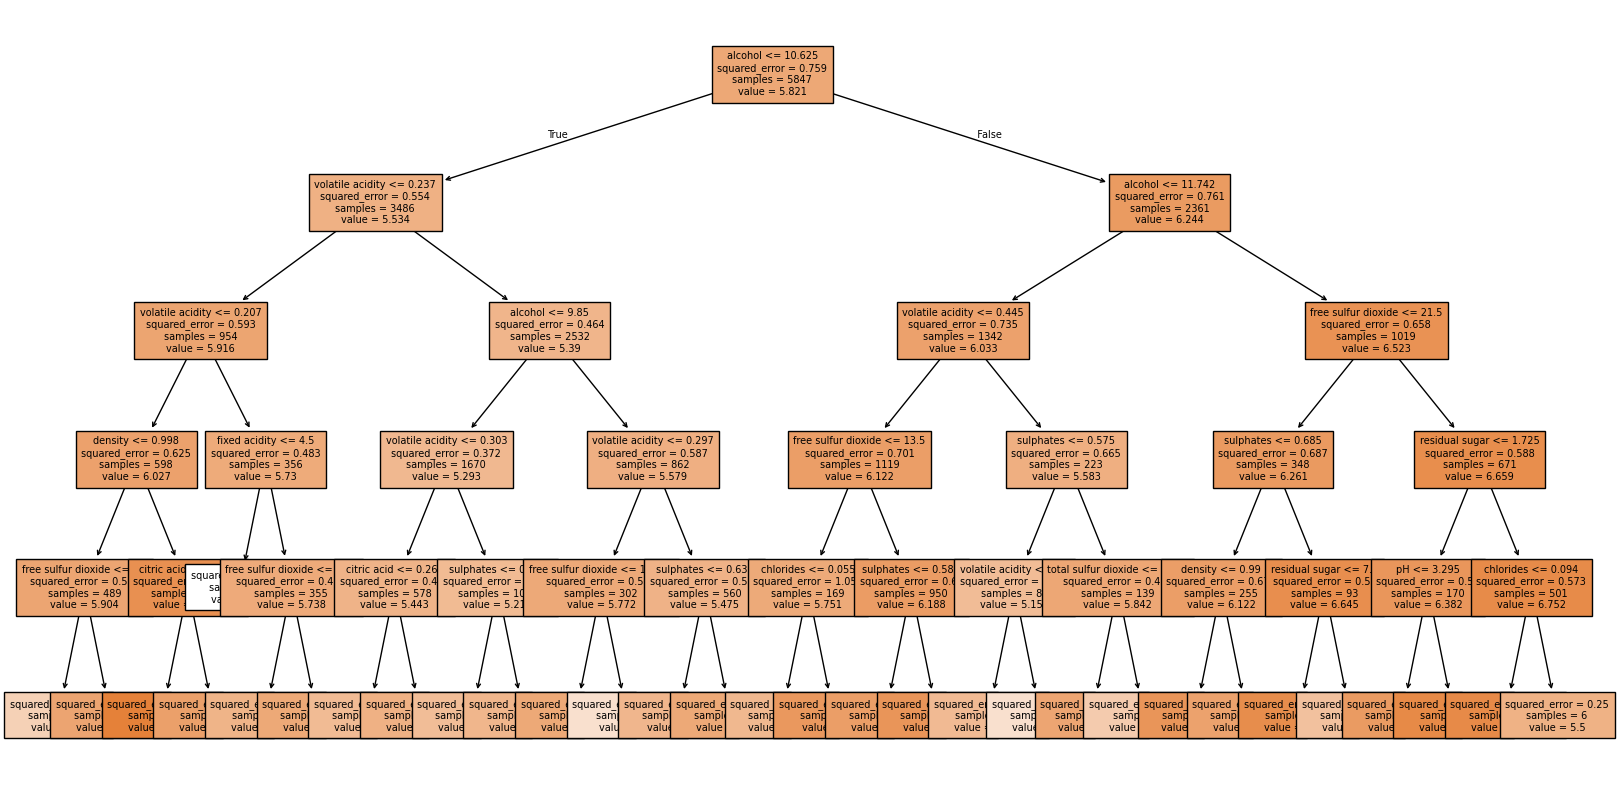

In [54]:
best_model_fixed = grid.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_model_fixed,
          feature_names=input_df.columns,
          filled=True,
          fontsize=7)
plt.show()

The model identifies alcohol content as the most dominant factor in determining wine quality, serving as the root split that immediately separates higher quality wines from lower ones. The primary rule established is that wines with higher alcohol generally receive higher predicted scores compared to those with lower alcohol. The tree further refines the score based on even higher alcohol level and interaction with free sulfur dioxide. For wines with lower alcohol (left branch), volatile acidity becomes the critical feature, as a high volatile acidity drives the score down significantly. Other features like sulphates, density and residual sugar appear deeper in the tree, acting as finetuning adjustments rather than important features.

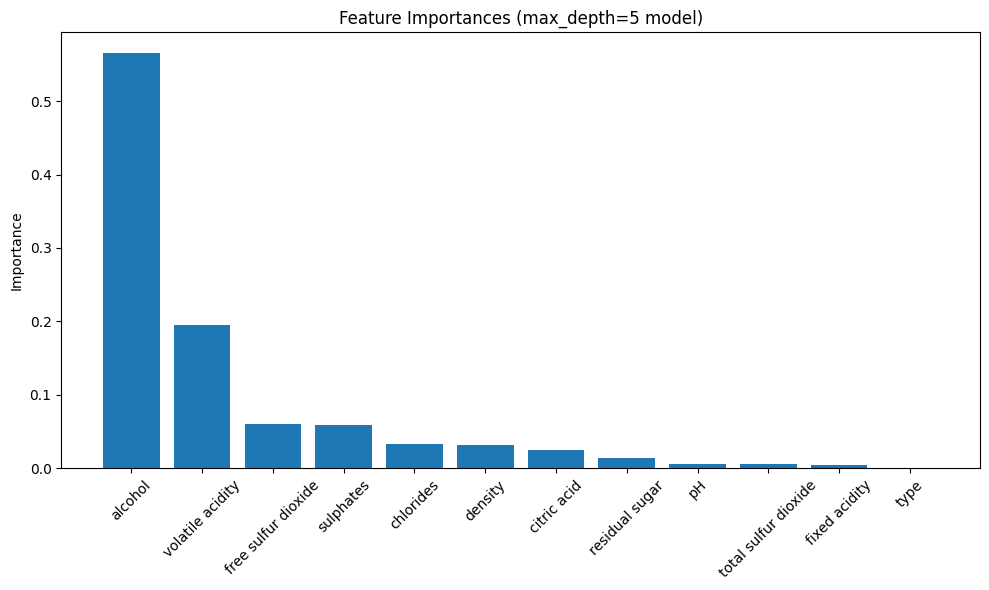

In [57]:
importances = best_model_fixed.feature_importances_
features = input_df.columns

indices = np.argsort(importances)[::-1] #sort by importance, reverses the order (largest to smallest)
sorted_features = features[indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10,6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=45)
plt.title("Feature Importances (max_depth=5 model)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [59]:
sorted_features, sorted_importances

(Index(['alcohol', 'volatile acidity', 'free sulfur dioxide', 'sulphates',
        'chlorides', 'density', 'citric acid', 'residual sugar', 'pH',
        'total sulfur dioxide', 'fixed acidity', 'type'],
       dtype='object'),
 array([0.56545165, 0.19544632, 0.06007506, 0.05817584, 0.03352224,
        0.03158366, 0.02471601, 0.01446835, 0.00637711, 0.0054651 ,
        0.00471865, 0.        ]))

The feature importance results show that alcohol is by far the most important predictor of wine quality, followed by volatile acidity, which aligns with known wine chemistry, as higher alcohol generally correlates with better quality while high volatile acidity lowers it. Moderate importance is observed for free sulfur dioxide and sulphates, while features like chlorides, density, citric acid, residual sugar, pH, total sulfur dioxide, fixed acidity and type have minimal impact. Overall, the model relies heavily on a few key chemical properties to predict quality, with other features providing minor refinements.